In [1]:
import os
import sys
from pathlib import Path

from shapely import Point, LineString, Polygon, MultiPolygon

curr_file_path = Path().absolute()
utils_path = os.path.abspath(os.path.join(curr_file_path, "..", "..", "tests"))
sys.path.append(utils_path)
import visualization as viz

from fix_polygon import fix_polygon

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


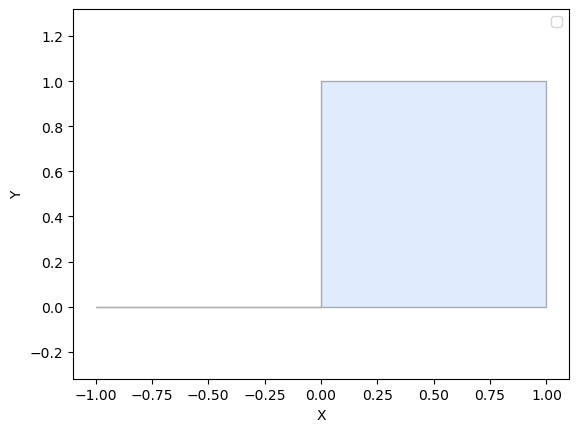

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


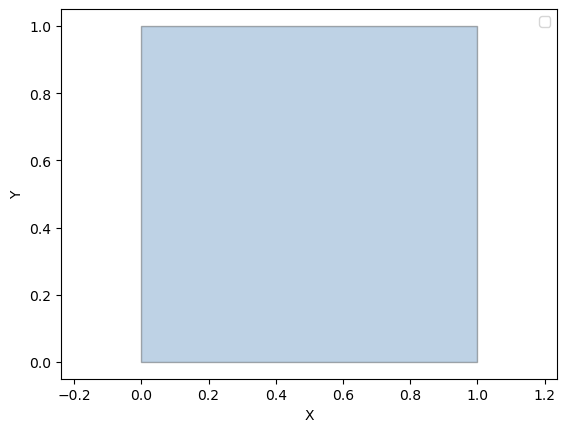

In [2]:
# dangling segment
coords = [
    Point(0, 0),
    Point(0, 1),
    Point(1, 1), 
    Point(1, 0),
    Point(0, 0),
    Point(-1, 0), # dangling segment
    Point(0, 0),
]
polygon = Polygon(coords)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


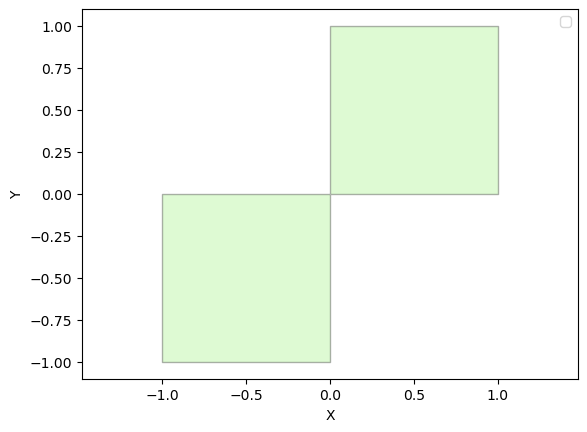

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


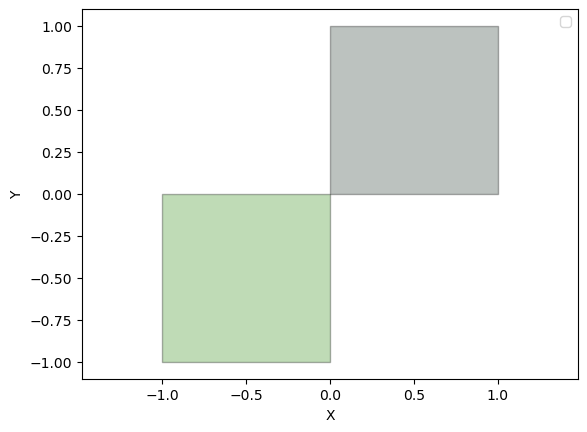

In [3]:
# danging area
coords = [
    Point(0, 0),
    Point(0, 1),
    Point(1, 1), 
    Point(1, 0),
    Point(0, 0),
    # begin: dangling area
    Point(-1, 0),
    Point(-1, -1),
    Point(0, -1),
    # end: dangling area
    Point(0, 0),
]
polygon = Polygon(coords)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


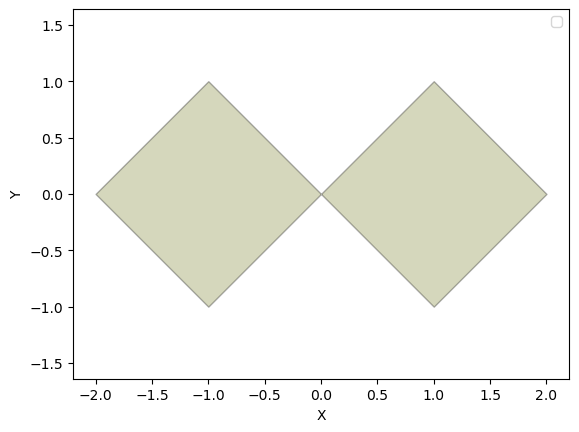

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


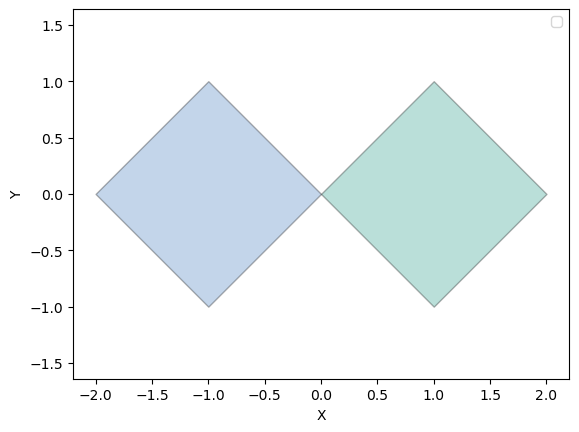

In [4]:
# self-intersection is not at coord
coords = [
    Point(-2, 0),
    Point(-1, 1),
    Point(1, -1), 
    Point(2, 0),
    Point(1, 1),
    Point(-1, -1),
    Point(-2, 0),
]
polygon = Polygon(coords)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


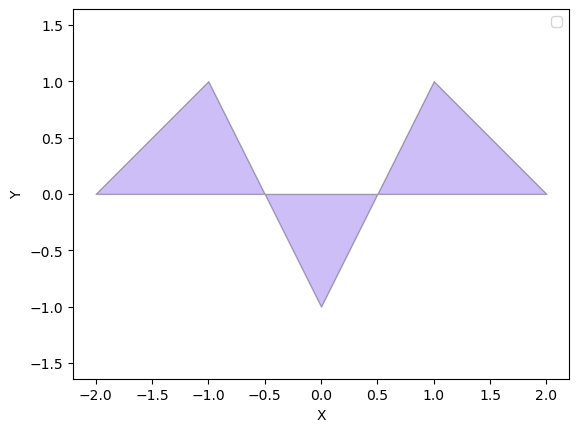

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


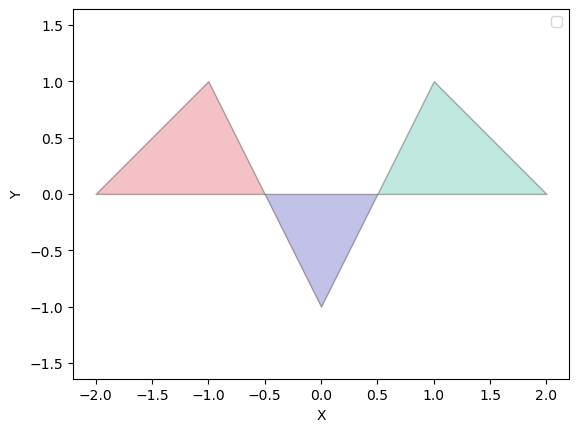

In [5]:
# double self-intersection
coords = [
    Point(-2, 0),
    Point(-1, 1),
    Point(0, -1),
    Point(1, 1),
    Point(2, 0),
    Point(-2, 0),
]
polygon = Polygon(coords)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)

In [2]:
def rend(polygon):
    # It's complicated rendering a polygon with holes.
    # Instead, we'll transform the polygon to a MultiPolygon
    # and render all the polygons of the MultiPolygon in one color.
    ps = []
    ps.append(Polygon(polygon.exterior))
    ps.extend([Polygon(interior) for interior in polygon.interiors])
    return MultiPolygon(ps)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


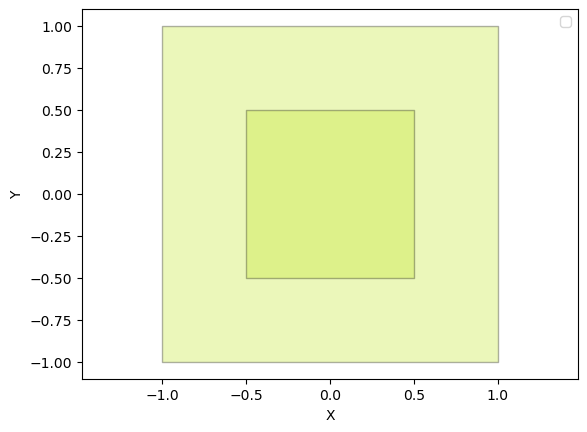

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


FIXED POLYGON ((-1 -1, -1 1, 1 1, 1 -1, -1 -1), (-0.5 -0.5, -0.5 0.5, 0.5 0.5, 0.5 -0.5, -0.5 -0.5))
FE LINEARRING (-1 -1, -1 1, 1 1, 1 -1, -1 -1)
FIS [<LINEARRING (-0.5 -0.5, -0.5 0.5, 0.5 0.5, 0.5 -0.5, -0.5 -0.5)>]


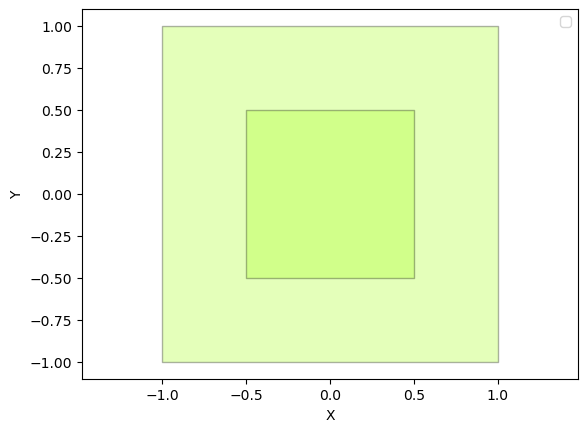

In [3]:
# has interior
exterior_coords = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
]
interior_coords = [
    Point(-0.5, -0.5),
    Point(-0.5, 0.5),
    Point(0.5, 0.5),
    Point(0.5, -0.5),
    Point(-0.5, -0.5),
]

polygon = Polygon(LineString(exterior_coords), [LineString(interior_coords)])
viz.show_polygons([rend(polygon)])

fixed = fix_polygon(polygon)
viz.show_polygons([rend(f) for f in fixed])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


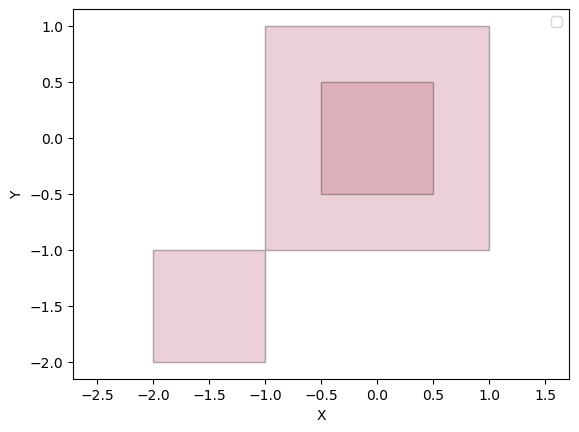

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


FIXED POLYGON ((-1 -1, -1 1, 1 1, 1 -1, -1 -1), (-0.5 -0.5, -0.5 0.5, 0.5 0.5, 0.5 -0.5, -0.5 -0.5))
FE LINEARRING (-1 -1, -1 1, 1 1, 1 -1, -1 -1)
FIS [<LINEARRING (-0.5 -0.5, -0.5 0.5, 0.5 0.5, 0.5 -0.5, -0.5 -0.5)>]
FIXED POLYGON ((-1 -1, -1 -2, -2 -2, -2 -1, -1 -1))
FE LINEARRING (-1 -1, -1 -2, -2 -2, -2 -1, -1 -1)
FIS []


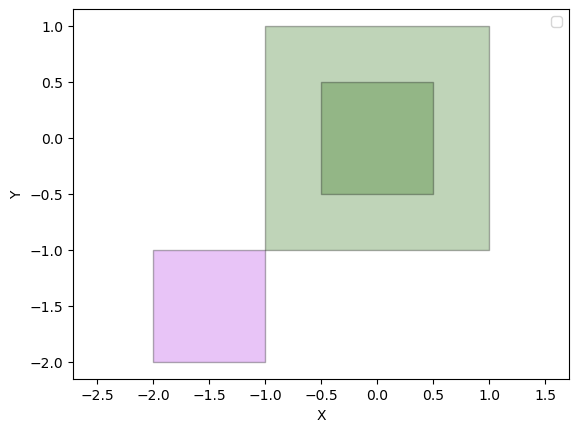

In [4]:
# has self-intersection and interior
exterior_coords = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
    Point(-2, -1),
    Point(-2, -2),
    Point(-1, -2),
    Point(-1, -1),
]
interior_coords = [
    Point(-0.5, -0.5),
    Point(-0.5, 0.5),
    Point(0.5, 0.5),
    Point(0.5, -0.5),
    Point(-0.5, -0.5),
]

polygon = Polygon(LineString(exterior_coords), [LineString(interior_coords)])
viz.show_polygons([rend(polygon)])

fixed = fix_polygon(polygon)
viz.show_polygons([rend(f) for f in fixed])